In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Input, Dense, BatchNormalization, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.applications import VGG16
from keras.optimizers import Adam


In [4]:
circle_data = np.load('D:\AIML\CNN - BuildwithAI\circle.npy') 
triangle_data = np.load('D:\AIML\CNN - BuildwithAI\striangle.npy') 

In [5]:
circle_data.shape

(122876, 784)

In [6]:
triangle_data.shape


(123170, 784)

In [6]:
data = np.concatenate((circle_data, triangle_data))
print(data.shape)

(246046, 784)


In [7]:
data = data.T

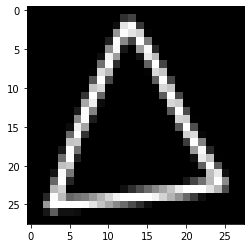

In [13]:
current_image = data[:, 123000, None]
current_image = current_image.reshape((28,28))
plt.gray()
plt.imshow(current_image)
plt.show()

In [13]:
data[:, 0, None]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 15],
       [109],
       [ 88],
       [ 50],
       [  6],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 69],
       [226],
      

In [14]:
data = data.T

In [15]:
data[0].shape

(784,)

In [16]:
data[0].reshape((28, 28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  15, 109,  88,  50,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         69, 226, 255, 255, 255, 240, 156,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 183, 207,
        254, 222,  51,  38,  77, 151, 239, 243,  96,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5, 126, 249, 255, 251,
        176,  80,   0,   0,   0,   0,  23, 183, 255, 141,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 208, 254, 157,  36,  38,
          0,   0,   0,   0,   0,   0,   0,   1, 135, 255, 132,   0,   0,
          0,   0],
       [  

In [63]:
data[1].shape

(784,)

In [19]:
data[0].reshape((28, 28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  15, 109,  88,  50,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         69, 226, 255, 255, 255, 240, 156,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 183, 207,
        254, 222,  51,  38,  77, 151, 239, 243,  96,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5, 126, 249, 255, 251,
        176,  80,   0,   0,   0,   0,  23, 183, 255, 141,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 208, 254, 157,  36,  38,
          0,   0,   0,   0,   0,   0,   0,   1, 135, 255, 132,   0,   0,
          0,   0],
       [  

In [27]:
data[0] = data[0].reshape(28, 28)

ValueError: could not broadcast input array from shape (28,28) into shape (784)

In [76]:
reshaped_data = data.reshape(246046, 28, 28, 1)

In [78]:
reshaped_data[1]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [73]:
model = Sequential()

model.add(Conv2D(28, (5, 5), strides = (1, 1), name = 'conv0', input_shape = (28, 28, 1)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2,2), name = 'max_pool'))
model.add(Conv2D(56, (3,3), strides = (1,1), name = 'conv1'))
model.add(Activation('relu'))
model.add(AveragePooling2D((3,3), name = 'avg_pool'))

model.add(GlobalAveragePooling2D())
model.add(Dense(300, activation='relu', name='r1'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid', name = 'sm'))



In [87]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-5), metrics=['accuracy'])

In [79]:
reshaped_data = reshaped_data / 255

In [80]:
reshaped_data

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [81]:
X_train = reshaped_data[:200000]
X_test = reshaped_data[200000:]

In [82]:
X_train.shape

(200000, 28, 28, 1)

In [83]:
Y_train_circle = np.zeros(122876)
Y_train_triangle = np.ones(123170)

In [84]:
Y_train = np.concatenate((Y_train_circle, Y_train_triangle))

In [85]:
Y_train.shape

(246046,)

In [88]:
history = model.fit(X_train, Y_train, batch_size = 28, epochs = 10, validation_split=0.2, shuffle=True, verbose = 2)

Epoch 1/10
5715/5715 - 236s - loss: 0.2910 - accuracy: 0.8805 - val_loss: 0.2991 - val_accuracy: 0.8985
Epoch 2/10
5715/5715 - 171s - loss: 0.1069 - accuracy: 0.9660 - val_loss: 0.2088 - val_accuracy: 0.9273
Epoch 3/10
5715/5715 - 157s - loss: 0.0844 - accuracy: 0.9737 - val_loss: 0.1936 - val_accuracy: 0.9334
Epoch 4/10
5715/5715 - 182s - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.1799 - val_accuracy: 0.9398
Epoch 5/10
5715/5715 - 203s - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.1485 - val_accuracy: 0.9514
Epoch 6/10
5715/5715 - 602s - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.1549 - val_accuracy: 0.9491
Epoch 7/10
5715/5715 - 159s - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.1412 - val_accuracy: 0.9527
Epoch 8/10
5715/5715 - 178s - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.1368 - val_accuracy: 0.9536
Epoch 9/10
5715/5715 - 164s - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.1125 - val_accuracy: 0.9607
Epoch 10/10
5715/5715 - 160s - loss: 0.0483 - accuracy: 0.9852 -

In [3]:
test_predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [90]:
test_predictions.shape

(46046, 1)

In [2]:
for i in range(len(test_predictions)):
    if test_predictions[i] <= 0.5:
        print(test_predictions[i], i)


NameError: name 'test_predictions' is not defined